# Bag of words


# Count vectorizer

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

In [2]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [3]:
# Returns a string
dataset = open("stop.txt", "r").read()
dataset = dataset.lower()
maskArray=dataset
cloud = WordCloud(background_color = "white", max_words = 300, mask = maskArray, stopwords = set(STOPWORDS))

In [4]:
dataset

"a\na's\nable\nabout\nabove\naccording\naccordingly\nacross\nactually\nafter\nafterwards\nagain\nagainst\nain't\nall\nallow\nallows\nalmost\nalone\nalong\nalready\nalso\nalthough\nalways\nam\namong\namongst\nan\nand\nanother\nany\nanybody\nanyhow\nanyone\nanything\nanyway\nanyways\nanywhere\napart\nappear\nappreciate\nappropriate\nare\naren't\naround\nas\naside\nask\nasking\nassociated\nat\navailable\naway\nawfully\nb\nbe\nbecame\nbecause\nbecome\nbecomes\nbecoming\nbeen\nbefore\nbeforehand\nbehind\nbeing\nbelieve\nbelow\nbeside\nbesides\nbest\nbetter\nbetween\nbeyond\nboth\nbrief\nbut\nby\nc\nc'mon\nc's\ncame\ncan\ncan't\ncannot\ncant\ncause\ncauses\ncertain\ncertainly\nchanges\nclearly\nco\ncom\ncome\ncomes\nconcerning\nconsequently\nconsider\nconsidering\ncontain\ncontaining\ncontains\ncorresponding\ncould\ncouldn't\ncourse\ncurrently\nd\ndefinitely\ndescribed\ndespite\ndid\ndidn't\ndifferent\ndo\ndoes\ndoesn't\ndoing\ndon't\ndone\ndown\ndownwards\nduring\ne\neach\nedu\neg\neight\ne

In [5]:
import spacy
nlp = spacy.load('en_core_web_sm')



C:\Users\HP\anaconda3\lib\site-packages\spacy\util.py:730: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.1.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [6]:
len(nlp.Defaults.stop_words)

326

In [7]:
# Print the set of spaCy's default stop words (remember that sets are unordered):
print(nlp.Defaults.stop_words)

{'otherwise', 'up', 'being', 'several', 'every', 'take', 'already', 'nevertheless', 'ten', 'as', 'too', 'in', 'me', 'and', 'perhaps', 'seemed', 'the', 'someone', 'nine', 'besides', 'since', 'until', 'who', 'noone', 'give', 'show', 'though', 'wherever', 'over', 'among', 'cannot', 'latter', 'along', 'n’t', 'most', 'thence', 'was', 'moreover', 'both', 'where', 'call', 'he', 'anyway', '‘s', 'then', 'anything', 'front', 'towards', 'somehow', 'fifteen', 'very', 'whatever', 'across', 'itself', 'should', 'behind', 'ca', 'if', 'toward', 'may', 're', 'just', "'ve", 'whereupon', 'anywhere', 'whom', 'hereupon', 'rather', 'regarding', 'would', 'put', 'more', 'before', 'therefore', 'a', 'three', "'s", 'becoming', 'around', 'have', 'down', 'beyond', 'done', 'fifty', 'themselves', 'none', 'at', 'herein', 'therein', '’s', 'why', 'become', 'into', 'hereafter', 'by', 'above', 'others', 'which', 'against', 'everywhere', 'however', 'often', 'per', 'enough', "'ll", 'unless', 'under', 'much', 'during', 'own'

In [8]:
nlp.vocab['myself'].is_stop

True

In [9]:
nlp.vocab['mystery'].is_stop

False

# Add a stop word

In [10]:
# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('btw')

# Set the stop_word tag on the lexeme
nlp.vocab['btw'].is_stop = True

In [11]:
len(nlp.Defaults.stop_words)

327

In [12]:
### To remove a stop word

# Remove the word from the set of stop words
nlp.Defaults.stop_words.remove('beyond')

# Remove the stop_word tag from the lexeme
nlp.vocab['beyond'].is_stop = False

In [13]:
len(nlp.Defaults.stop_words)

326

In [14]:
nlp.vocab['beyond'].is_stop

False

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy #language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [16]:
import pandas as pd
stop=pd.read_csv("stop.txt",error_bad_lines=False)

In [17]:
stop

,a
0,a's
1,able
2,about
3,above
4,according
...,...
565,yours
566,yourself
567,yourselves
568,z


In [18]:
stop = [a.strip() for a in stop.a] # remove both the leading and the trailing characters
stop = [a for a in stop if a] # removes empty strings, because they are considered in Python as False
stop[0:10]

["a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards']

In [19]:
# Joining the list into one string/text
text = ' '.join(stop)
text

"a's able about above according accordingly across actually after afterwards again against ain't all allow allows almost alone along already also although always am among amongst an and another any anybody anyhow anyone anything anyway anyways anywhere apart appear appreciate appropriate are aren't around as aside ask asking associated at available away awfully b be became because become becomes becoming been before beforehand behind being believe below beside besides best better between beyond both brief but by c c'mon c's came can can't cannot cant cause causes certain certainly changes clearly co com come comes concerning consequently consider considering contain containing contains corresponding could couldn't course currently d definitely described despite did didn't different do does doesn't doing don't done down downwards during e each edu eg eight either else elsewhere enough entirely especially et etc even ever every everybody everyone everything everywhere ex exactly example 

In [20]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'as able about above according accordingly across actually after afterwards again against aint all allow allows almost alone along already also although always am among amongst an and another any anybody anyhow anyone anything anyway anyways anywhere apart appear appreciate appropriate are arent around as aside ask asking associated at available away awfully b be became because become becomes becoming been before beforehand behind being believe below beside besides best better between beyond both brief but by c cmon cs came can cant cannot cant cause causes certain certainly changes clearly co com come comes concerning consequently consider considering contain containing contains corresponding could couldnt course currently d definitely described despite did didnt different do does doesnt doing dont done down downwards during e each edu eg eight either else elsewhere enough entirely especially et etc even ever every everybody everyone everything everywhere ex exactly example except f f

In [21]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['as', 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', 'aint', 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', 'arent', 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at']


In [22]:
len(text_tokens)

571

In [23]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['able', 'according', 'accordingly', 'across', 'actually', 'afterwards', 'aint', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'among', 'amongst', 'another', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'arent', 'around', 'aside', 'ask', 'asking', 'associated', 'available', 'away', 'awfully', 'b']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
#Noramalize the data
lower_words = [a.lower() for a in no_stop_tokens]
print(lower_words[0:25])

['able', 'according', 'accordingly', 'across', 'actually', 'afterwards', 'aint', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'among', 'amongst', 'another', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways']


In [25]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['abl', 'accord', 'accordingli', 'across', 'actual', 'afterward', 'aint', 'allow', 'allow', 'almost', 'alon', 'along', 'alreadi', 'also', 'although', 'alway', 'among', 'amongst', 'anoth', 'anybodi', 'anyhow', 'anyon', 'anyth', 'anyway', 'anyway', 'anywher', 'apart', 'appear', 'appreci', 'appropri', 'arent', 'around', 'asid', 'ask', 'ask', 'associ', 'avail', 'away', 'aw', 'b']


In [26]:
# NLP english language model of spacy library
nlp = spacy.load("en_core_web_sm")
 

C:\Users\HP\anaconda3\lib\site-packages\spacy\util.py:730: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.1.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [27]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

able according accordingly across actually afterwards aint allow allows almost alone along already also although always among amongst another anybody anyhow anyone anything anyway anyways anywhere apart appear appreciate appropriate arent around aside ask asking associated available away


In [28]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['able', 'accord', 'accordingly', 'across', 'actually', 'afterwards', 'ai', 'nt', 'allow', 'allow', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'among', 'amongst', 'another', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway']


# Feature Extraction

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
a = vectorizer.fit_transform(lemmas)

In [30]:
print(vectorizer.vocabulary_)

{'able': 0, 'accord': 1, 'accordingly': 2, 'across': 3, 'actually': 4, 'afterwards': 5, 'ai': 6, 'nt': 191, 'allow': 7, 'almost': 8, 'alone': 9, 'along': 10, 'already': 11, 'also': 12, 'although': 13, 'always': 14, 'among': 15, 'amongst': 16, 'another': 17, 'anybody': 18, 'anyhow': 19, 'anyone': 20, 'anything': 21, 'anyway': 22, 'anyways': 23, 'anywhere': 24, 'apart': 25, 'appear': 26, 'appreciate': 27, 'appropriate': 28, 'be': 36, 'around': 29, 'aside': 30, 'ask': 31, 'associate': 32, 'available': 33, 'away': 34, 'awfully': 35, 'became': 37, 'become': 38, 'becomes': 39, 'beforehand': 40, 'behind': 41, 'believe': 42, 'beside': 43, 'besides': 44, 'well': 313, 'beyond': 45, 'brief': 46, 'cmon': 53, 'cs': 64, 'come': 56, 'ca': 47, 'cause': 48, 'certain': 49, 'certainly': 50, 'change': 51, 'clearly': 52, 'co': 54, 'com': 55, 'concern': 57, 'consequently': 58, 'consider': 59, 'contain': 60, 'correspond': 61, 'could': 62, 'course': 63, 'currently': 65, 'definitely': 66, 'describe': 67, 'desp

In [31]:
print(vectorizer.get_feature_names()[50:100])
print(a.toarray()[50:100])

['certainly', 'change', 'clearly', 'cmon', 'co', 'com', 'come', 'concern', 'consequently', 'consider', 'contain', 'correspond', 'could', 'course', 'cs', 'currently', 'definitely', 'describe', 'despite', 'different', 'do', 'downwards', 'edu', 'eg', 'eight', 'either', 'else', 'elsewhere', 'enough', 'entirely', 'especially', 'et', 'etc', 'even', 'ever', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'ex', 'exactly', 'example', 'except', 'far', 'fifth', 'first', 'five', 'follow', 'former']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [32]:
print(a.toarray().shape)

(476, 342)


# Let's see how can bigrams and trigrams can be included here¶


In [33]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(stop)

In [34]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['able', 'can', 'he', 'here', 'it', 'let', 'll', 'neither', 'never', 'nevertheless', 'new', 'next', 'nine', 'no', 'nobody', 'non', 'none', 'nor', 'normally', 'not', 'nothing', 'novel', 'now', 'nowhere', 'obviously', 'of', 'off', 'often', 'oh', 'ok', 'okay', 'old', 'probably', 'quite', 'rather', 'rd', 're', 'really', 'reasonably', 'regarding', 'regardless', 'regards', 'relatively', 'respectively', 'right', 'said', 'same', 'saw', 'say', 'saying', 'says', 'second', 'secondly', 'see', 'seeing', 'seem', 'seemed', 'seeming', 'seems', 'seen', 'self', 'selves', 'sensible', 'sent', 'serious', 'seriously', 'seven', 'several', 'shall', 'she', 'should', 'shouldn', 'since', 'six', 'so', 'some', 'somebody', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhat', 'somewhere', 'soon', 'sorry', 'specified', 'specify', 'specifying', 'still', 'that', 'there', 'they', 've', 'we', 'what', 'where', 'who', 'would', 'you']
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 .

# Tf-Idf Vectorizer

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(stop)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', 'ain', 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', 'aren', 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'came', 'can', 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'contains', 'corresponding', 'could', 'couldn', 'course',

# Generate wordcloud

In [36]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

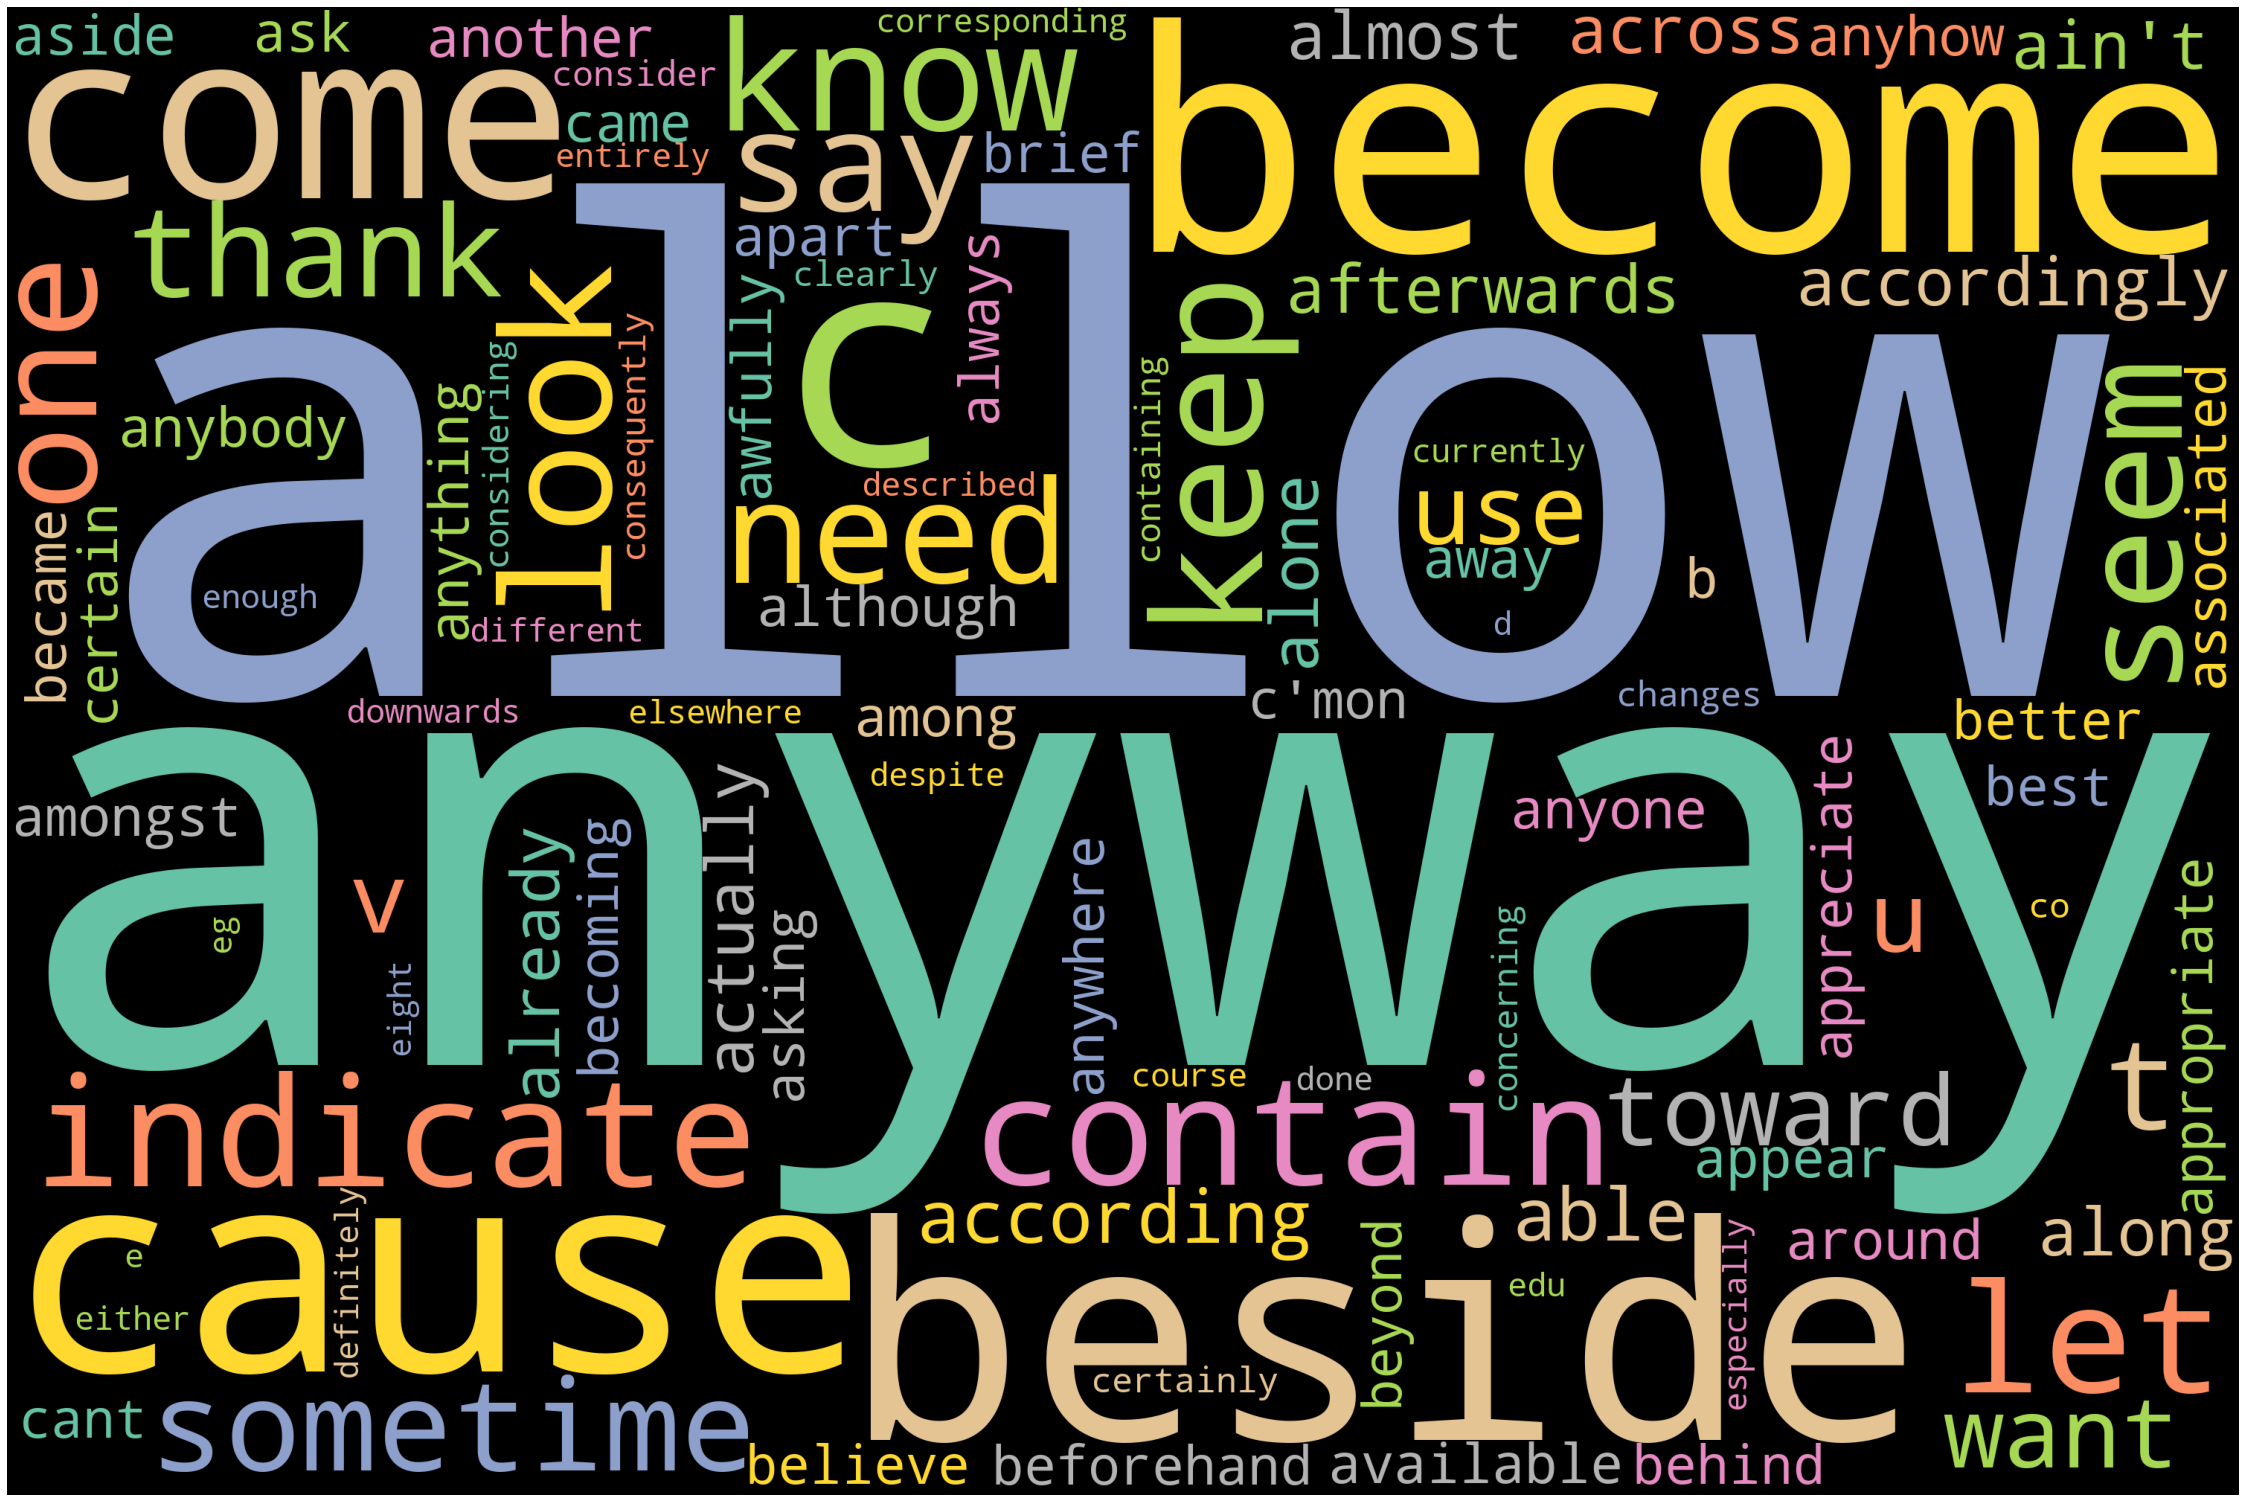

In [37]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [38]:
# Save image
#wordcloud.to_file("wordcloud.png")